# Udacity Capstone Project

## EEG signal Based Eye State Classification

### Loading the files in Google colab

In [1]:
# You can skip this step if you are training on local System

#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#fid = drive.ListFile({'q':"title='EEG Eye State.txt'"}).GetList()[0]['id']
#f = drive.CreateFile({'id': fid})
#f.GetContentFile('EEG Eye State.txt')

In [2]:
# Loading the dataset

fname = "EEG Eye State.txt"
with open(fname) as f:
    content = f.readlines()

content = [x.strip() for x in content] 
content = [x.split(",") for x in content]

In [3]:
# Converting list to numpy array

import numpy as np

content = np.array(content, dtype = 'float32')

In [4]:
# Shuffling the dataset

import random
random.shuffle(content)

In [5]:
# Storing results of algorithms
score_p = []

### Creating X and Y

In [6]:
x = content[:, :-1]
y = np.array(content[:, -1], dtype = 'int32')

In [7]:
x[0]

array([4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92,
       4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9 , 4393.85],
      dtype=float32)

In [8]:
y[0]

0

# Statistical Features approach

## Data Preparation

In [9]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats

In [10]:
X_columns = ['mean', 'standard deviation', 'kurt', 'skewness']
Y_columns = ['label']

In [11]:
X = pd.DataFrame(columns = X_columns)
Y = pd.DataFrame(columns = Y_columns)

In [12]:
for i in range(len(x)):
  X.loc[i] = np.array([np.mean(x[i]), np.std(x[i]), scipy.stats.kurtosis(x[i]), scipy.stats.skew(x[i])])
  Y.loc[i] = y[i]

In [13]:
X.head(n=20)

,mean,standard deviation,kurt,skewness
0,4316.593750,186.395279,-0.686817,0.439234
1,4312.748535,186.797379,-0.673855,0.459162
2,4312.748535,186.797379,-0.673855,0.459162
3,4316.593750,186.395279,-0.686817,0.439234
4,4316.189941,184.204300,-0.716226,0.414606
5,4316.227051,183.612762,-0.696899,0.422589
6,4307.143555,183.993057,-0.686661,0.435931
7,4316.593750,186.395279,-0.686817,0.439234
8,4310.731934,183.971970,-0.709318,0.420956
9,4312.160645,184.608978,-0.693921,0.443294


In [14]:
Y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [15]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)



## Training on SVM

In [16]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train1, y_train1) 

/home/lin/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
predicted = clf.predict(X_test1)

In [18]:
from sklearn import metrics

### Performance

In [19]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test1, predicted), metrics.precision_score(y_test1, predicted),metrics.recall_score(y_test1, predicted),metrics.f1_score(y_test1, predicted)))

score_p.append([metrics.accuracy_score(y_test1, predicted), metrics.precision_score(y_test1, predicted),metrics.recall_score(y_test1, predicted),metrics.f1_score(y_test1, predicted)]) 


Accuracy = 0.6899198931909212
Precision = 0.700952380952381
Recall = 0.706786171574904
F1 Score = 0.7038571883965573


## Training on Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf_D = LogisticRegression()
clf_D.fit(X_train1, y_train1)


/home/lin/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
predict = clf_D.predict(X_test1)


### Performance

In [23]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test1, predict), metrics.precision_score(y_test1, predict),metrics.recall_score(y_test1, predict),metrics.f1_score(y_test1, predict)))
score_p.append([metrics.accuracy_score(y_test1, predict), metrics.precision_score(y_test1, predict),metrics.recall_score(y_test1, predict),metrics.f1_score(y_test1, predict)])

Accuracy = 0.5367156208277704
Precision = 0.5520334928229665
Recall = 0.5909090909090909
F1 Score = 0.5708101422387137


## Second Approach Directly use 14 values of EEG data and use it for prediction 

### Normalization of data

Normalization of data is required before using it on Nueral Networks

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
scaler.fit(x)
x_new = scaler.transform(x)

In [26]:
data_mean = x.mean()
data_std = x.std()
x = (x - data_mean)/data_std

In [27]:
(x_train, x_test) = x[:11000], x[11000:]
(y_train, y_test) = y[:11000], y[11000:]

## Training on Neural Networks

### Creating Model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [29]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (x.shape[1], )))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               7680      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               7680      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
_________________________________________________________________


### Training

In [31]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'MLP.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model.fit(x_train, y_train, epochs = 100, batch_size=256, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True)

Train on 9900 samples, validate on 1100 samples
Epoch 1/100
 - 1s - loss: 0.6901 - acc: 0.5317 - val_loss: 0.6911 - val_acc: 0.5264

Epoch 00001: val_loss improved from inf to 0.69112, saving model to MLP.weights.best.hdf5
Epoch 2/100
 - 0s - loss: 0.6888 - acc: 0.5330 - val_loss: 0.6908 - val_acc: 0.5264

Epoch 00002: val_loss improved from 0.69112 to 0.69082, saving model to MLP.weights.best.hdf5
Epoch 3/100
 - 0s - loss: 0.6877 - acc: 0.5339 - val_loss: 0.6898 - val_acc: 0.5273

Epoch 00003: val_loss improved from 0.69082 to 0.68977, saving model to MLP.weights.best.hdf5
Epoch 4/100
 - 0s - loss: 0.6857 - acc: 0.5376 - val_loss: 0.6887 - val_acc: 0.5391

Epoch 00004: val_loss improved from 0.68977 to 0.68875, saving model to MLP.weights.best.hdf5
Epoch 5/100
 - 0s - loss: 0.6846 - acc: 0.5523 - val_loss: 0.6880 - val_acc: 0.5500

Epoch 00005: val_loss improved from 0.68875 to 0.68799, saving model to MLP.weights.best.hdf5
Epoch 6/100
 - 1s - loss: 0.6819 - acc: 0.5506 - val_loss: 0.

 - 0s - loss: 0.6077 - acc: 0.6332 - val_loss: 0.6698 - val_acc: 0.5600

Epoch 00052: val_loss did not improve from 0.66911
Epoch 53/100
 - 0s - loss: 0.6081 - acc: 0.6282 - val_loss: 0.6689 - val_acc: 0.5600

Epoch 00053: val_loss improved from 0.66911 to 0.66888, saving model to MLP.weights.best.hdf5
Epoch 54/100
 - 0s - loss: 0.6065 - acc: 0.6330 - val_loss: 0.6738 - val_acc: 0.5464

Epoch 00054: val_loss did not improve from 0.66888
Epoch 55/100
 - 0s - loss: 0.6073 - acc: 0.6316 - val_loss: 0.6694 - val_acc: 0.5536

Epoch 00055: val_loss did not improve from 0.66888
Epoch 56/100
 - 0s - loss: 0.6054 - acc: 0.6307 - val_loss: 0.6693 - val_acc: 0.5564

Epoch 00056: val_loss did not improve from 0.66888
Epoch 57/100
 - 0s - loss: 0.6042 - acc: 0.6360 - val_loss: 0.6696 - val_acc: 0.5618

Epoch 00057: val_loss did not improve from 0.66888
Epoch 58/100
 - 0s - loss: 0.6053 - acc: 0.6292 - val_loss: 0.6716 - val_acc: 0.5545

Epoch 00058: val_loss did not improve from 0.66888
Epoch 59/10

In [32]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: ", score[1])

3980/3980 [==============================] - 0s 88us/step
Accuracy:  0.5701005024826107


In [33]:
predict2 = [1 if a>0.5 else 0 for a in model.predict(x_test)] 

### Performance

In [34]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict2), metrics.precision_score(y_test, predict2),metrics.recall_score(y_test, predict2),metrics.f1_score(y_test, predict2)))
#score_p.append([metrics.accuracy_score(y_test, predict2), metrics.precision_score(y_test, predict2),metrics.recall_score(y_test, predict2),metrics.f1_score(y_test, predict2)])

Accuracy = 0.5701005025125628
Precision = 0.5518134715025906
Recall = 0.65504869297796
F1 Score = 0.5990157018982891


# Improved Neural Network (Tuning Parameters)

In [35]:
model2 = Sequential()
model2.add(Dense(1000, activation = 'relu', input_shape = (x.shape[1], )))
model2.add(Dropout(0.2))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              15000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total para

In [36]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              15000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total para

In [37]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'MLP_new.weights.best.hdf5', verbose = 1, save_best_only = True)
hist1 = model2.fit( x_train, y_train, epochs = 200, batch_size=512, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True )

Train on 9900 samples, validate on 1100 samples
Epoch 1/200
 - 18s - loss: 0.6928 - acc: 0.5349 - val_loss: 0.6900 - val_acc: 0.5264

Epoch 00001: val_loss improved from inf to 0.69000, saving model to MLP_new.weights.best.hdf5
Epoch 2/200
 - 12s - loss: 0.6831 - acc: 0.5487 - val_loss: 0.6834 - val_acc: 0.5445

Epoch 00002: val_loss improved from 0.69000 to 0.68341, saving model to MLP_new.weights.best.hdf5
Epoch 3/200
 - 12s - loss: 0.6600 - acc: 0.5883 - val_loss: 0.6754 - val_acc: 0.5445

Epoch 00003: val_loss improved from 0.68341 to 0.67541, saving model to MLP_new.weights.best.hdf5
Epoch 4/200
 - 11s - loss: 0.6326 - acc: 0.6096 - val_loss: 0.6758 - val_acc: 0.5500

Epoch 00004: val_loss did not improve from 0.67541
Epoch 5/200
 - 11s - loss: 0.6208 - acc: 0.6146 - val_loss: 0.7173 - val_acc: 0.5555

Epoch 00005: val_loss did not improve from 0.67541
Epoch 6/200
 - 12s - loss: 0.6223 - acc: 0.6107 - val_loss: 0.6688 - val_acc: 0.5518

Epoch 00006: val_loss improved from 0.67541 


Epoch 00057: val_loss did not improve from 0.66450
Epoch 58/200
 - 12s - loss: 0.3674 - acc: 0.8358 - val_loss: 0.8937 - val_acc: 0.6545

Epoch 00058: val_loss did not improve from 0.66450
Epoch 59/200
 - 12s - loss: 0.3864 - acc: 0.8221 - val_loss: 0.7437 - val_acc: 0.6773

Epoch 00059: val_loss did not improve from 0.66450
Epoch 60/200
 - 12s - loss: 0.3682 - acc: 0.8345 - val_loss: 0.7181 - val_acc: 0.6391

Epoch 00060: val_loss did not improve from 0.66450
Epoch 61/200
 - 12s - loss: 0.3962 - acc: 0.8143 - val_loss: 0.7064 - val_acc: 0.6745

Epoch 00061: val_loss did not improve from 0.66450
Epoch 62/200
 - 11s - loss: 0.3590 - acc: 0.8427 - val_loss: 0.7433 - val_acc: 0.6945

Epoch 00062: val_loss did not improve from 0.66450
Epoch 63/200
 - 11s - loss: 0.3565 - acc: 0.8427 - val_loss: 0.7248 - val_acc: 0.6900

Epoch 00063: val_loss did not improve from 0.66450
Epoch 64/200
 - 11s - loss: 0.3598 - acc: 0.8368 - val_loss: 0.7335 - val_acc: 0.6918

Epoch 00064: val_loss did not imp


Epoch 00116: val_loss did not improve from 0.65049
Epoch 117/200
 - 12s - loss: 0.3228 - acc: 0.8534 - val_loss: 0.6913 - val_acc: 0.6991

Epoch 00117: val_loss did not improve from 0.65049
Epoch 118/200
 - 11s - loss: 0.2921 - acc: 0.8682 - val_loss: 0.6756 - val_acc: 0.7091

Epoch 00118: val_loss did not improve from 0.65049
Epoch 119/200
 - 12s - loss: 0.2927 - acc: 0.8629 - val_loss: 0.8882 - val_acc: 0.6900

Epoch 00119: val_loss did not improve from 0.65049
Epoch 120/200
 - 12s - loss: 0.2905 - acc: 0.8692 - val_loss: 0.7058 - val_acc: 0.7027

Epoch 00120: val_loss did not improve from 0.65049
Epoch 121/200
 - 11s - loss: 0.2861 - acc: 0.8673 - val_loss: 0.7202 - val_acc: 0.7318

Epoch 00121: val_loss did not improve from 0.65049
Epoch 122/200
 - 11s - loss: 0.2709 - acc: 0.8779 - val_loss: 0.6790 - val_acc: 0.7209

Epoch 00122: val_loss did not improve from 0.65049
Epoch 123/200
 - 12s - loss: 0.2741 - acc: 0.8771 - val_loss: 0.6950 - val_acc: 0.7200

Epoch 00123: val_loss did 


Epoch 00174: val_loss did not improve from 0.58920
Epoch 175/200
 - 12s - loss: 0.2359 - acc: 0.8968 - val_loss: 0.6886 - val_acc: 0.7218

Epoch 00175: val_loss did not improve from 0.58920
Epoch 176/200
 - 12s - loss: 0.2568 - acc: 0.8870 - val_loss: 0.5710 - val_acc: 0.7455

Epoch 00176: val_loss improved from 0.58920 to 0.57098, saving model to MLP_new.weights.best.hdf5
Epoch 177/200
 - 12s - loss: 0.2439 - acc: 0.8949 - val_loss: 0.6855 - val_acc: 0.7427

Epoch 00177: val_loss did not improve from 0.57098
Epoch 178/200
 - 12s - loss: 0.2178 - acc: 0.9081 - val_loss: 0.6619 - val_acc: 0.7491

Epoch 00178: val_loss did not improve from 0.57098
Epoch 179/200
 - 12s - loss: 0.2087 - acc: 0.9137 - val_loss: 0.6905 - val_acc: 0.7255

Epoch 00179: val_loss did not improve from 0.57098
Epoch 180/200
 - 13s - loss: 0.2493 - acc: 0.8903 - val_loss: 0.6522 - val_acc: 0.7482

Epoch 00180: val_loss did not improve from 0.57098
Epoch 181/200
 - 12s - loss: 0.2588 - acc: 0.8834 - val_loss: 0.600

In [38]:
score = model2.evaluate(x_test, y_test, verbose=1)
print("Accuracy: ", score[1])

3980/3980 [==============================] - 3s 752us/step
Accuracy:  0.7233668342307584


In [39]:
predict3 = [1 if a>=0.5 else 0 for a in model2.predict(x_test)] 

In [40]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict3), metrics.precision_score(y_test, predict3),metrics.recall_score(y_test, predict3),metrics.f1_score(y_test, predict3)))
score_p.append([metrics.accuracy_score(y_test, predict3), metrics.precision_score(y_test, predict3),metrics.recall_score(y_test, predict3),metrics.f1_score(y_test, predict3)])

Accuracy = 0.7233668341708542
Precision = 0.6720647773279352
Recall = 0.8508457201435161
F1 Score = 0.7509613209681067


In [41]:
import matplotlib.pyplot as plt

# Training on  LSTM

### Creating 3D array dataset

In [42]:
X_train = np.asarray(np.reshape(x_train, (x_train.shape[0], 14, 1)))
X_test = np.asarray(np.reshape(x_test, (x_test.shape[0], 14, 1)))

In [43]:
from keras.layers import Dense, Dropout, CuDNNLSTM, Embedding, LSTM
from keras.models import Sequential

In [44]:
model3 = Sequential()
model3.add(LSTM(256,input_shape=(14, 1), return_sequences=True))
model3.add(LSTM(256))
model3.add(Dense(1, activation='sigmoid'))

In [45]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 14, 256)           264192    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________


In [46]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'LSTM.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model3.fit(X_train, y_train, epochs = 100, batch_size=256, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True)

Train on 9900 samples, validate on 1100 samples
Epoch 1/100
 - 103s - loss: 0.6913 - acc: 0.5292 - val_loss: 0.6919 - val_acc: 0.5264

Epoch 00001: val_loss improved from inf to 0.69191, saving model to LSTM.weights.best.hdf5
Epoch 2/100
 - 143s - loss: 0.6913 - acc: 0.5330 - val_loss: 0.6917 - val_acc: 0.5264

Epoch 00002: val_loss improved from 0.69191 to 0.69166, saving model to LSTM.weights.best.hdf5
Epoch 3/100
 - 151s - loss: 0.6907 - acc: 0.5330 - val_loss: 0.6916 - val_acc: 0.5264

Epoch 00003: val_loss improved from 0.69166 to 0.69155, saving model to LSTM.weights.best.hdf5
Epoch 4/100
 - 102s - loss: 0.6899 - acc: 0.5330 - val_loss: 0.6908 - val_acc: 0.5264

Epoch 00004: val_loss improved from 0.69155 to 0.69085, saving model to LSTM.weights.best.hdf5
Epoch 5/100
 - 105s - loss: 0.6901 - acc: 0.5367 - val_loss: 0.6905 - val_acc: 0.5264

Epoch 00005: val_loss improved from 0.69085 to 0.69048, saving model to LSTM.weights.best.hdf5
Epoch 6/100
 - 97s - loss: 0.6870 - acc: 0.534

 - 46s - loss: 0.5176 - acc: 0.7246 - val_loss: 0.6973 - val_acc: 0.5782

Epoch 00056: val_loss did not improve from 0.64800
Epoch 57/100
 - 47s - loss: 0.5047 - acc: 0.7329 - val_loss: 0.6922 - val_acc: 0.5845

Epoch 00057: val_loss did not improve from 0.64800
Epoch 58/100
 - 48s - loss: 0.4984 - acc: 0.7328 - val_loss: 0.6619 - val_acc: 0.5891

Epoch 00058: val_loss did not improve from 0.64800
Epoch 59/100
 - 50s - loss: 0.5002 - acc: 0.7284 - val_loss: 0.6817 - val_acc: 0.5882

Epoch 00059: val_loss did not improve from 0.64800
Epoch 60/100
 - 51s - loss: 0.4990 - acc: 0.7413 - val_loss: 0.6711 - val_acc: 0.5918

Epoch 00060: val_loss did not improve from 0.64800
Epoch 61/100
 - 49s - loss: 0.4946 - acc: 0.7411 - val_loss: 0.6733 - val_acc: 0.6009

Epoch 00061: val_loss did not improve from 0.64800
Epoch 62/100
 - 48s - loss: 0.5230 - acc: 0.7110 - val_loss: 0.6689 - val_acc: 0.5991

Epoch 00062: val_loss did not improve from 0.64800
Epoch 63/100
 - 47s - loss: 0.5099 - acc: 0.734

In [47]:
score = model3.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1])

3980/3980 [==============================] - 12s 3ms/step
Accuracy:  0.6648241206030151


In [48]:
predict4 =  [1 if a>0.5 else 0 for a in model3.predict(X_test)]


### Performance

In [49]:
#print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict4), metrics.precision_score(y_test, predict4),metrics.recall_score(y_test, predict4),metrics.f1_score(y_test, predict4)))
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict4), metrics.precision_score(y_test, predict4),metrics.recall_score(y_test, predict4),metrics.f1_score(y_test, predict4)))
score_p.append([metrics.accuracy_score(y_test, predict4), metrics.precision_score(y_test, predict4),metrics.recall_score(y_test, predict4),metrics.f1_score(y_test, predict4)])

Accuracy = 0.6648241206030151
Precision = 0.6776050662061025
Recall = 0.6032803690415172
F1 Score = 0.6382863340563991


# Improved LSTM (Tuning Parameter)

In [50]:
#model4 = Sequential()
#model4.add(CuDNNLSTM(units=512, input_shape=(14, 1), return_sequences=True))
#model4.add(CuDNNLSTM(units=512))
#model4.add(Dense(1, activation='sigmoid'))
#model4.summary()

In [51]:
#model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model4.summary()

In [52]:
#from keras.callbacks import ModelCheckpoint
#from tensorflow.contrib.rnn import *

#checkpointer = ModelCheckpoint(filepath = 'LSTM_new.weights.best.hdf5', verbose = 1, save_best_only = True)
#hist = model4.fit(X_train, y_train, epochs = 300, batch_size= 512, validation_split = 0.1, callbacks = [checkpointer], verbose = 2, shuffle = True)

In [53]:
#score = model4.evaluate(X_test, y_test, verbose=1)
#print("Accuracy: ", score[1])

In [54]:
#predict5 =  [1 if a>0.5 else 0 for a in model4.predict(X_test)]

In [55]:
#print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict5), metrics.precision_score(y_test, predict5),metrics.recall_score(y_test, predict5),metrics.f1_score(y_test, predict5)))
#score_p.append([metrics.accuracy_score(y_test, predict5), metrics.precision_score(y_test, predict5),metrics.recall_score(y_test, predict5),metrics.f1_score(y_test, predict5)])

In [56]:
#plt.plot(hist.history['loss'], label = 'train')
#plt.plot(hist.history['val_loss'], label = 'valid')
#plt.legend()
#plt.show()

# Conclusion

## Ploting the results

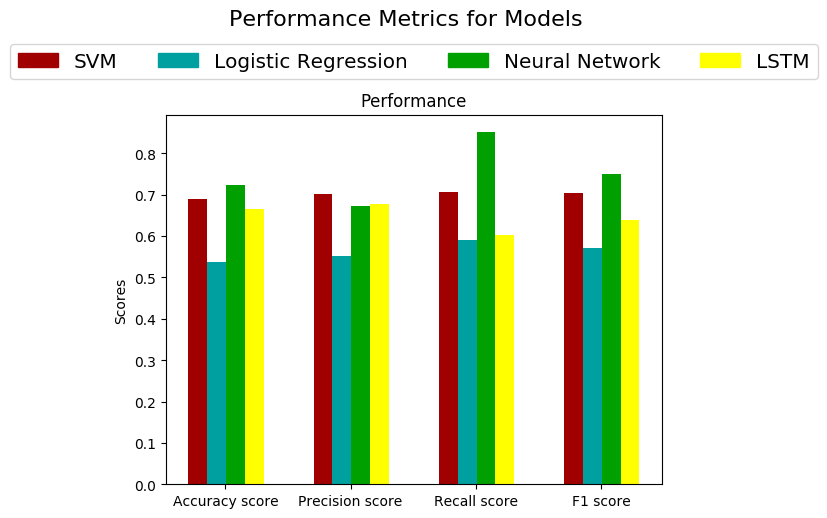

In [57]:
#For plotting the results code is copied from Udacity Finding Donors for Charity ML Project


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

objects = ['Accuracy score', 'Precision score', 'Recall score', 'F1 score']
w =  0.15
y_pos = np.arange(len(objects))

color = ['#A00000','#00A0A0','#00A000', '#FFFF00']
s = 0
for i in range(len(score_p)):
    plt.bar(y_pos+s, score_p[i], color = color[i], width = w )
    s += w
    
plt.xticks(y_pos + 0.22, objects)
plt.ylabel('Scores')
plt.title('Performance')
plt.suptitle("Performance Metrics for Models", fontsize = 16, y = 1.10)

p = ['SVM',  'Logistic Regression', 'Neural Network', 'LSTM']

patches = []

for k in range(len(p)):
    patches.append(mpatches.Patch(color = color[k], label = p[k]))

plt.legend(handles = patches, bbox_to_anchor = (0.5, 1.19),loc = 'upper center', borderaxespad = 0., ncol = 4, fontsize = 'x-large')

plt.show();